In [1]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import observations
import state
import mcmc
import driver
import numpy as np

In [2]:
true_state1 = state.State(planets= [{'a':1.0500, 'm':0.004965, 'ix':0.3, 'iy':-0.5}, {'a':0.7200, 'm':0.002965, 'ix':-0.6, 'iy':-0.1}])
true_state2 = state.State(planets= [{'a':1.0500, 'm':0.004965, 'ix':0.0, 'iy':-0.0}, {'a':0.7200, 'm':0.002965, 'ix':-0.0, 'iy':-0.0}])

obs1 = driver.create_obs(true_state1, 200, 6.5e-4, 2e-5, 65.5)
obs2 = driver.create_obs(true_state2, 200, 6.5e-4, 2e-5, 65.5)

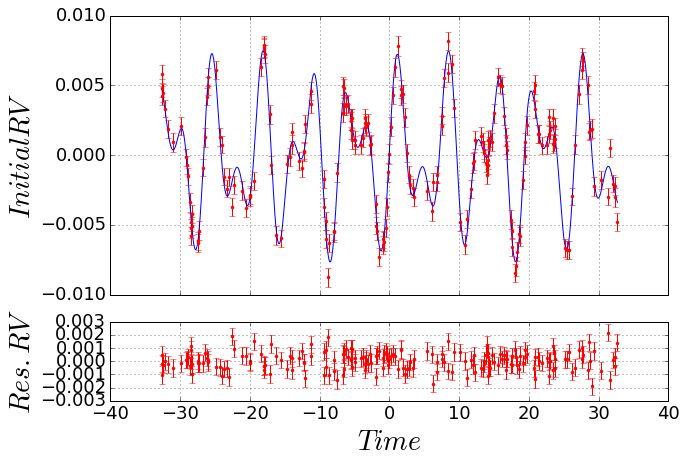

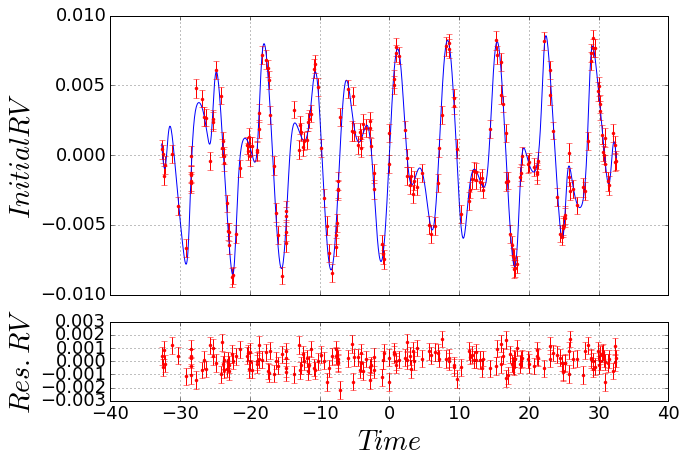

In [3]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.plot(*true_state1.get_rv_plotting(obs1), color="blue")
plt.errorbar(obs1.t, obs1.rv, yerr=obs1.err, fmt='.r')
ax.set_xticklabels([])
ax.set_ylabel("$Initial RV$", fontsize=28)
ax.tick_params(axis='both', labelsize=18)
plt.grid()
frame2=fig.add_axes([0.125, -0.17, 0.775, 0.22])
plt.tick_params(axis='both', labelsize=18)  
frame2.set_ylabel("$Res. RV$", fontsize=28)
frame2.set_xlabel("$Time$", fontsize=28)      
plt.errorbar(obs1.t, true_state1.get_rv(obs1.t)-obs1.rv, yerr=obs1.err, fmt='.r')
plt.grid()

#Second plot is to highlight the effects of inclination on the system 
#which lead to different planet-planet interactions

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.plot(*true_state2.get_rv_plotting(obs2), color="blue")
plt.errorbar(obs2.t, obs2.rv, yerr=obs2.err, fmt='.r')
ax.set_xticklabels([])
ax.set_ylabel("$Initial RV$", fontsize=28)
ax.tick_params(axis='both', labelsize=18)
plt.grid()
frame2=fig.add_axes([0.125, -0.17, 0.775, 0.22])
plt.tick_params(axis='both', labelsize=18)  
frame2.set_ylabel("$Res. RV$", fontsize=28)
frame2.set_xlabel("$Time$", fontsize=28)      
plt.errorbar(obs2.t, true_state2.get_rv(obs2.t)-obs2.rv, yerr=obs2.err, fmt='.r')
plt.grid()

In [4]:
Niter, Walkers, Scale = 1024*32, 32, {'a':0.0001,'m':0.00001, 'ix':0.001, 'iy':0.001}

In [5]:
mcmc, chain, chainlogp = driver.run_emcee(Niter, true_state1, obs1, Walkers, Scale)

Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (ix & iy)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (ix & iy)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (ix & iy)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was proposed (m)
Invalid state was pro

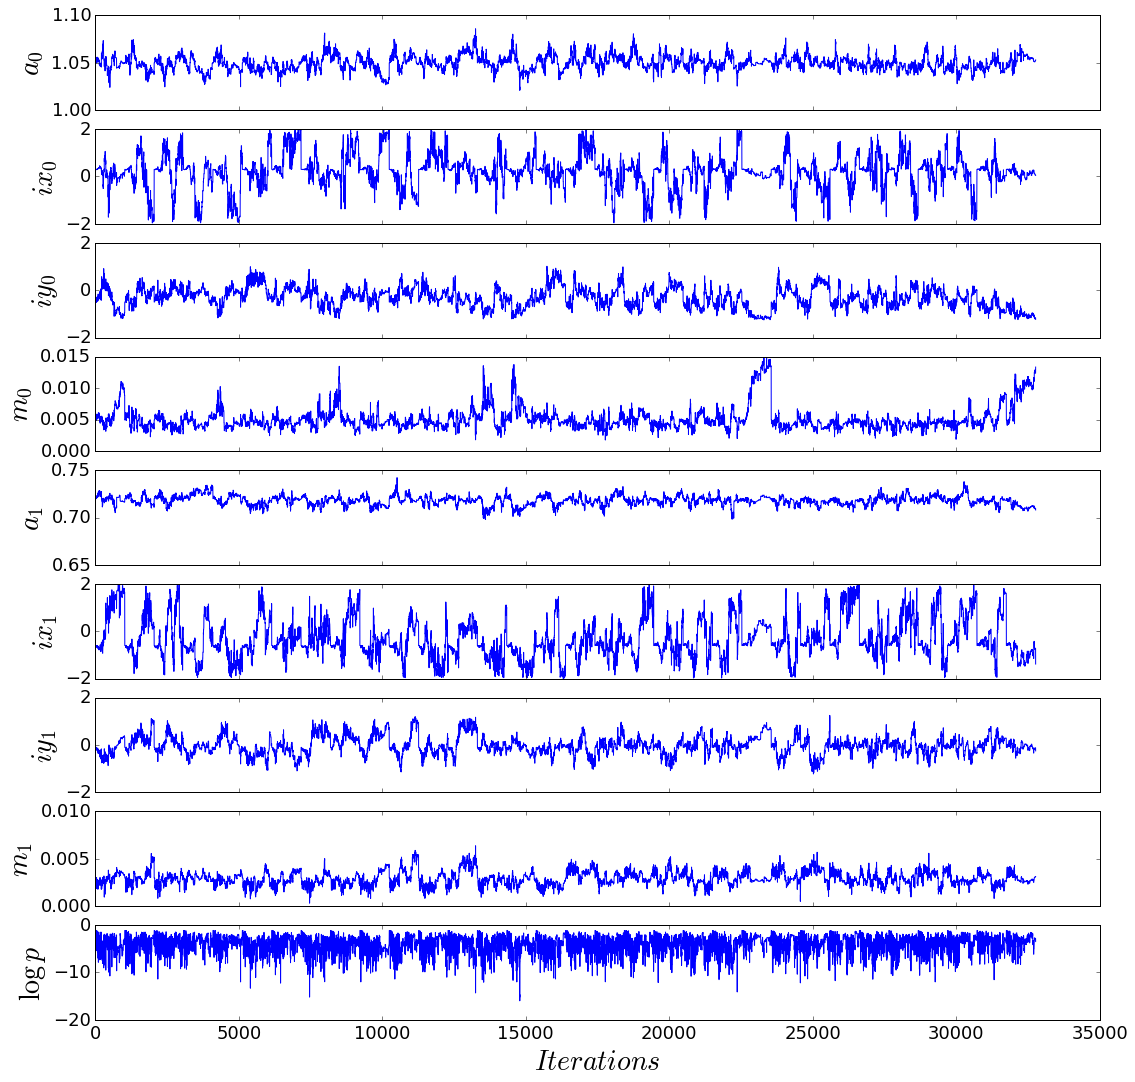

In [7]:
fig = plt.figure(figsize=(18,18))
for i in range(mcmc.state.Nvars):
    ax = plt.subplot(mcmc.state.Nvars+1,1,1+i)
    ax.set_ylabel(mcmc.state.get_keys()[i])
    ax.tick_params(axis='x', labelbottom='off')
    ax.yaxis.label.set_size(28)
    ax.tick_params(axis='both', labelsize=18)
    ax.locator_params(axis='y', nbins=3)
    ax.plot(chain[:,i])
ax = plt.subplot(mcmc.state.Nvars+1,1,mcmc.state.Nvars+1)
ax.set_ylabel("$\log \, p$")
ax.set_xlabel("$Iterations$")
ax.yaxis.label.set_size(28)
ax.xaxis.label.set_size(28)
ax.tick_params(axis='both', labelsize=18)
ax.locator_params(axis='y', nbins=3)
ax.plot(chainlogp)